In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('./spam_or_not_spam.csv')

# Show the first few rows
print(data.head())


                                               email  label
0   date wed NUMBER aug NUMBER NUMBER NUMBER NUMB...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [3]:
# Clean the email text safely
import re


def clean_email(text):
    # Ensure the input is a string; if not, return an empty string
    if not isinstance(text, str):
        return ""
    # Remove special characters and numbers
    text = re.sub(r'[^a-zA-Z]', ' ', text)
    # Convert to lowercase
    text = text.lower()
    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text)
    return text

# Apply cleaning to the email column
data['email'] = data['email'].apply(clean_email)

# Show cleaned data
print(data.head())


                                               email  label
0   date wed number aug number number number numb...      0
1  martin a posted tassos papadopoulos the greek ...      0
2  man threatens explosion in moscow thursday aug...      0
3  klez the virus that won t die already the most...      0
4   in adding cream to spaghetti carbonara which ...      0


In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Turn words into numbers
vectorizer = TfidfVectorizer(max_features=1000)  # Use the 1,000 most common words
X = vectorizer.fit_transform(data['email']).toarray()  # Convert emails to numbers
y = data['label']  # Target: spam (1) or not spam (0)

# Print the first row of numbers
print(X[0])


[0.         0.0469834  0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.04115035 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.04794008 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0298431
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.0217615
 0.04641353 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.02990445 0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.04110017 0.      

In [5]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training examples: {len(X_train)}")
print(f"Testing examples: {len(X_test)}")


Training examples: 2100
Testing examples: 900


In [6]:
from sklearn.naive_bayes import MultinomialNB

# Create and train the model
model = MultinomialNB()
model.fit(X_train, y_train)

# Test the model
y_pred = model.predict(X_test)


In [7]:
from sklearn.metrics import accuracy_score, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Show confusion matrix
cm = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(cm)


Accuracy: 96.67%
Confusion Matrix:
[[743   2]
 [ 28 127]]


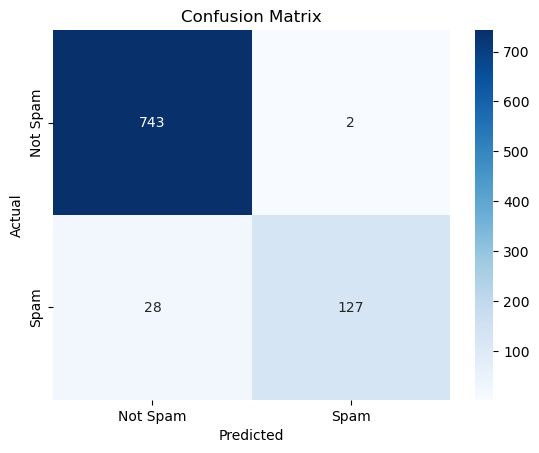

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Spam', 'Spam'], yticklabels=['Not Spam', 'Spam'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [9]:
# New email example
new_email = ["Congratulations! You've won a free trip to Bahamas"]
cleaned_email = vectorizer.transform([clean_email(new_email[0])])  # Clean and vectorize
prediction = model.predict(cleaned_email)

# Show the result
print("Spam" if prediction[0] == 1 else "Not Spam")


Not Spam
